# About
Compares EOFs and Complex EOFs (CEOFs) by calculating the spatial distribution of the temporal variance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import hilbert

In [6]:
# ==============================
# Load data
# ==============================

mat = loadmat("../bbm_tidecrittry.mat")
B2s = mat["B2s"]  # adjust key if needed
x = mat["x"]

sz = B2s.shape

# ==============================
# Create complexified data (Hilbert transform row-wise)
# ==============================

B2sc = np.zeros_like(B2s, dtype=np.complex128)

for ii in range(sz[1]):
    B2sc[:, ii] = hilbert(B2s[:, ii])

# ==============================
# Covariance matrices
# ==============================

# MATLAB cov assumes variables in columns, matches B2s shape (space x time)
mymat = np.cov(B2s.T, rowvar=False)
mymatc = np.cov(B2sc.T, rowvar=False)
# mymat = np.cov(B2s)
# mymatc = np.cov(B2sc)

# ==============================
# Eigen decomposition (real EOF)
# ==============================

eigvals, V = np.linalg.eig(mymat)

myeigs = eigvals.real
myeigs = myeigs / np.sum(myeigs)

# sort descending
myeigsi = np.argsort(myeigs)[::-1]
myeigs = myeigs[myeigsi]

# ==============================
# Eigen decomposition (complex EOF)
# ==============================

eigvalsc, Vc = np.linalg.eig(mymatc)

# eigenvalues are real even though matrix is complex
myeigsc = eigvalsc.real
myeigsc = myeigsc / np.sum(myeigsc)

myeigsci = np.argsort(myeigsc)[::-1]
myeigsc = myeigsc[myeigsci]


In [4]:
V[:, myeigsi[0]].shape

(2048,)

In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jun  4 11:10:17 2020',
 '__version__': '1.0',
 '__globals__': [],
 'B1s': array([[ 2.27292143e-15,  4.54248184e-15,  6.80987385e-15, ...,
          8.92064392e-03,  6.64851684e-03,  4.20575618e-03],
        [-2.26023627e-15, -4.51656941e-15, -6.77105941e-15, ...,
          9.68210642e-03,  7.62783607e-03,  5.23153728e-03],
        [ 2.27075303e-15,  4.54150606e-15,  6.81041595e-15, ...,
          1.03263222e-02,  8.54680298e-03,  6.26289121e-03],
        ...,
        [-2.28172380e-15, -4.58937359e-15, -6.91702013e-15, ...,
          6.14072653e-03,  3.60644869e-03,  1.44925471e-03],
        [ 2.25491013e-15,  4.48588649e-15,  6.68936477e-15, ...,
          7.12711413e-03,  4.61032601e-03,  2.28574942e-03],
        [-2.27213539e-15, -4.55928698e-15, -6.86432790e-15, ...,
          8.06171218e-03,  5.63375825e-03,  3.21413307e-03]],
       shape=(2048, 600)),
 'B2s': array([[-3.99311660e-16, -8.01333826e-16, -1.20509

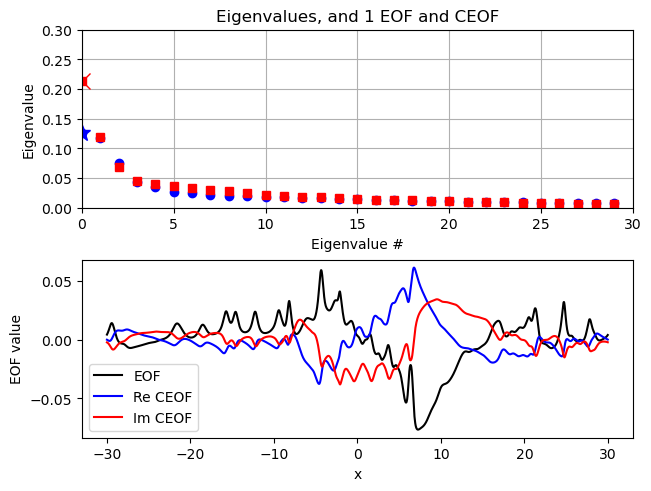

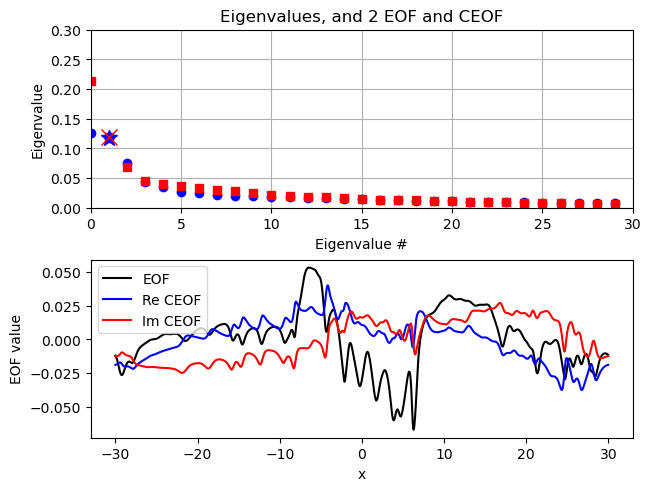

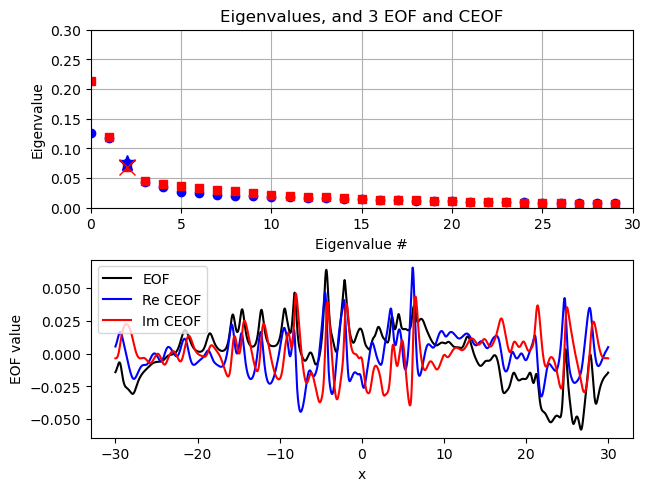

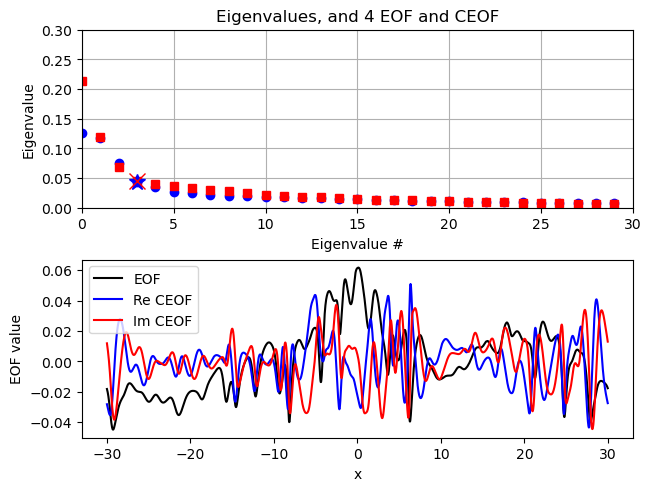

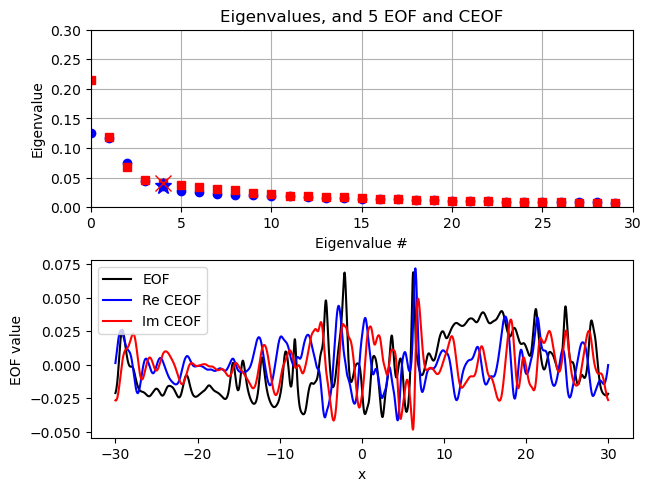

In [9]:
# ==============================
# Plot comparisons
# ==============================

for eofi in range(5):

    plt.figure(eofi + 1, layout='constrained')
    plt.clf()

    # ----- Eigenvalues -----
    plt.subplot(2, 1, 1)
    plt.plot(myeigs[:30], "bo")
    plt.plot(myeigsc[:30], "rs")

    plt.plot(eofi, myeigs[eofi], "b*", markersize=12)
    plt.plot(eofi, myeigsc[eofi], "rx", markersize=12)

    plt.grid(True)
    plt.xlim(0, 30)
    plt.ylim(0, 0.3)
    plt.xlabel('Eigenvalue #')
    plt.ylabel('Eigenvalue')
    plt.title(f"Eigenvalues, and {eofi+1} EOF and CEOF")

    # ----- EOF vs CEOF mode -----
    plt.subplot(2, 1, 2)

    eofnow = V[:, myeigsi[eofi]]
    ceofnow = Vc[:, myeigsci[eofi]]

    # x is ?
    plt.plot(x[0], eofnow.real, "k")
    plt.plot(x[0], ceofnow.real, "b")
    plt.plot(x[0], ceofnow.imag, "r")

    plt.xlabel('x')
    plt.ylabel('EOF value')
    plt.legend(["EOF", "Re CEOF", "Im CEOF"])

plt.show()

Observations:
- The real EOF in these first modes is much smaller than the complex EOF
- The first mode has the slowest-varying EOFs